In [93]:
import openai

In [94]:
from pdf2image import convert_from_path
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL.PpmImagePlugin import PpmImageFile

POPPLER_PATH = r"/opt/homebrew/bin" 
TESSERACT_ENGINE_PATH = r"/opt/homebrew/bin/tesseract"
pytesseract.pytesseract.tesseract_cmd = TESSERACT_ENGINE_PATH

python(70667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(70669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(70670) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


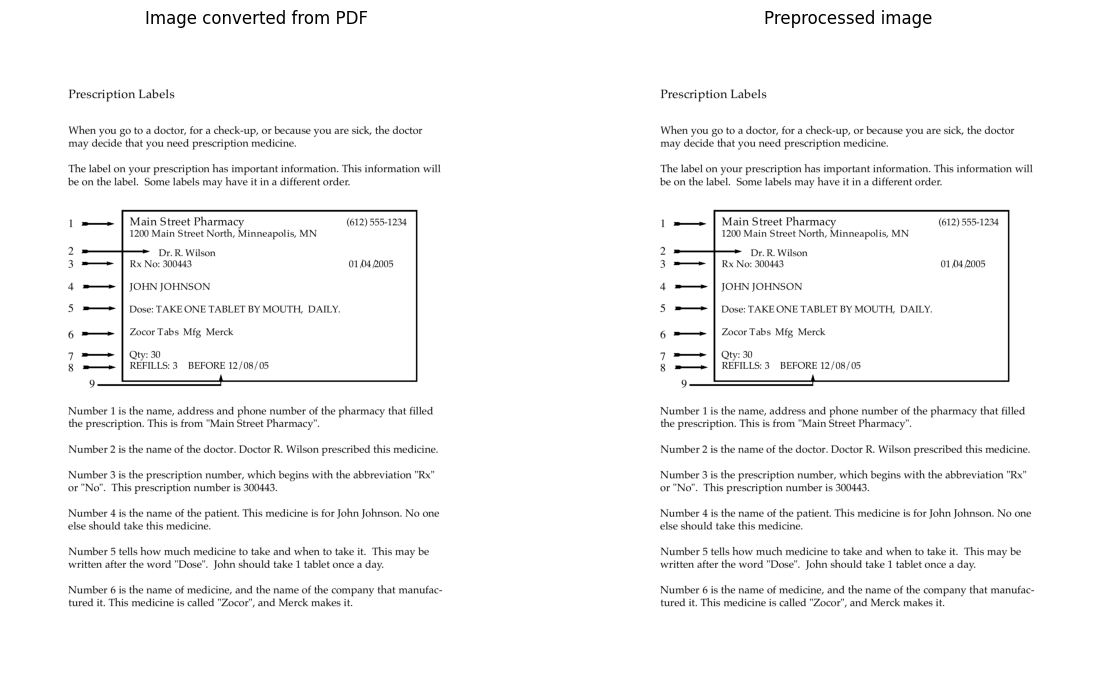

-------------------------------------------------------------------


In [120]:
from pdf2image import convert_from_path
import pytesseract
import matplotlib.pyplot as plt

# Define your POPPLER_PATH here if needed
# POPPLER_PATH = "path_to_poppler_bin"

def preprocess_image(image):
    # Add your image preprocessing steps here (if necessary)
    return image  # Return the preprocessed image (replace this with actual preprocessing)

def display_images_from_pdf(path: str):
    # Convert PDF to images
    pages = convert_from_path(path, poppler_path=POPPLER_PATH)
    original_image = pages[0]
    preprocessed_image = preprocess_image(original_image)
    
    # Display the original and preprocessed images side by side
    plt.figure(figsize=(14, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis(False)
    plt.title("Image converted from PDF")
    
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image, cmap="gray")
    plt.axis(False)
    plt.title("Preprocessed image")
    
    plt.show()
    print("-------------------------------------------------------------------")
    
    # Return the preprocessed image for further processing (e.g., text extraction)
    return preprocessed_image

def extract_text_from_image(image) -> str:
    # Extract text from the preprocessed image using pytesseract
    return pytesseract.image_to_string(image, lang="eng")

# Example usage

# Step 1: Display the images and get the preprocessed image
DOC_1_PATH = r"/Users/rohananthony/Downloads/prescription-template-03.pdf"
preprocessed_image = display_images_from_pdf(DOC_1_PATH)





In [121]:
# Extract and print the text from the preprocessed image

extracted_text = extract_text_from_image(preprocessed_image)
print(extracted_text)

python(70671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Prescription Labels

When you go to a doctor, for a check-up, or because you are sick, the doctor
may decide that you need prescription medicine.

The label on your prescription has important information. This information will
be on the label. Some labels may have it in a different order.

| =» | Main Street Pharmacy (612) 555-1234
1200 Main Street North, Minneapolis, MN

Dr. R. Wilson
Rx No: 300443 01 4 2005

k WN

ALLL

JOHN JOHNSON

Nn

Dose: TAKE ONE TABLET BY MOUTH, DAILY.
Zocor Tabs Mfg Merck

Qty: 30
REFILLS: 3 BEFORE 12/08/05

Number 1 is the name, address and phone number of the pharmacy that filled
the prescription. This is from "Main Street Pharmacy".

Number 2 is the name of the doctor. Doctor R. Wilson prescribed this medicine.

Number 3 is the prescription number, which begins with the abbreviation "Rx"
or "No". This prescription number is 300443.

Number 4 is the name of the patient. This medicine is for John Johnson. No one
else should take this medicine.

Number 5 tell

In [122]:
import openai

def get_gpt_response(prompt, max_tokens=200):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "Sara is a personalized AI nurse offering deeply empathetic advice on medications, diet, and health conditions. She provides comfort, support, and clear guidance to patients, helping them understand their prescriptions, manage their diet, and navigate their health conditions with a compassionate tone. When analyzing medical records or prescriptions, Sara AI first ensures that patients feel heard and understood, offering options such as help with a prescription, guidance on managing a condition, or general advice. She will always prioritize patient-friendly explanations and remain within the context of health and medical issues, avoiding unrelated content. Sara AI will provide homemade remedies, lifestyle changes, or dietary advice when medications or vaccines are not specified. Additionally, if Sara recognizes that a patient has a specific condition, such as diabetes, and the patient is craving a snack, Sara will analyze the nutritional values of the snack provided by the patient. She will suggest whether the snack is advisable, recommend portion control, or provide alternatives such as engaging in additional physical activity to balance out the intake. All responses are designed to provide personalized advice and relevant statistics in a manner that makes patients feel supported and understood throughout their interaction."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=max_tokens,
        temperature=0.7,
    )
    return response.choices[0].message['content'].strip()

prompt = extracted_text
response = get_gpt_response(prompt)
print(response)


Hello,

Thank you for sharing the details of your prescription. The information you provided is indeed correct and is crucial for the proper use of your medication. The medication you've been prescribed, Zocor, is used to help lower "bad" cholesterol and fats (such as LDL, triglycerides) and raise "good" cholesterol (HDL) in the blood. It belongs to a group of drugs known as "statins."

Just to recap, it's important that you take one tablet daily as prescribed by your doctor, Dr. R. Wilson. Make sure to follow any dietary advice given with this medication. It can be taken with or without food.

Remember, you have three refills before December 8, 2005. You can refill this prescription at Main Street Pharmacy, where you got it first. If you have any questions or concerns about the medication or experience any side effects, don't hesitate to contact your doctor or the pharmacy.

I'm here to help if you
